# fun_control_init

In [ ]:
from spotPython.utils.init import fun_control_init
fun_control = fun_control_init(_L_in=64, _L_out=11, num_workers=0, device=None)
fun_control

In [ ]:
import pandas as pd

def class_attributes_to_dataframe(class_obj):
    # Get the attributes and their values of the class object
    attributes = [attr for attr in dir(class_obj) if not callable(getattr(class_obj, attr)) and not attr.startswith("__")]
    values = [getattr(class_obj, attr) for attr in attributes]
    
    # Create a DataFrame from the attributes and values
    df = pd.DataFrame({'Attribute Name': attributes, 'Attribute Value': values})
    
    return df

# Example usage:
class MyClass:
    def __init__(self):
        self.name = "John"
        self.age = 30
        self.salary = 50000

my_instance = MyClass()
df = class_attributes_to_dataframe(my_instance)
print(df)



In [ ]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
# number of initial points:
ni = 7
# number of points
n = 10

fun = analytical().fun_sphere
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=True,
            design_control=design_control,)
spot_1.run()


In [ ]:
from sys import stdout
df = spot_1.class_attributes_to_dataframe()
stdout.write(df.to_string())

In [ ]:
from river import datasets
from river import evaluate
from river.linear_model import LogisticRegression
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()

model = (
    preprocessing.StandardScaler() |
    LogisticRegression()
)

metric = metrics.Accuracy()

evaluate.progressive_val_score(dataset, model, metric)


# Load CSV

In [ ]:
from spotPython.data.csvdataset import CSVDataset
# dataset = CSVDataset(csv_file='./data/spotPython/data.csv', target_column='prognosis')
dataset = CSVDataset(target_column='prognosis')
print(dataset.data.shape)
print(dataset.targets.shape)            

In [ ]:
dataset.extra_repr()

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 3
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# CSV Data set VBDP

In [ ]:
# load the csv_file='./data/spotPython/data.csv' as a pandas df and save it as a pickle file
import pandas as pd
df = pd.read_csv('./data/spotPython/data.csv')
df.to_pickle('./data/spotPython/data.pkl')


In [ ]:
from spotPython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# PyHcf


In [ ]:
from pyhcf.data.daten_sensitive import DatenSensitive
from pyhcf.utils.names import get_short_parameter_names
daten = DatenSensitive()
df = daten.load()
names =  df.columns
names = get_short_parameter_names(names)
# rename columns with short names
df.columns = names
df.head()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive.pkl')
# remove all rows with NaN values
df = df.dropna()
# save the df as a csv file
df.to_csv('./data/spotPython/data_sensitive_rmNA.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotPython/data_sensitive_rmNA.pkl')


# PyHcf data loading

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
# from spotPython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotPython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

# Pickle data loading

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset.feature_type

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Data Sensitive

In [ ]:
from spotPython.light.pkldataset import PKLDataset
import torch
dataset = PKLDataset(pkl_file='./data/spotPython/data_sensitive.pkl', target_column='A', feature_type=torch.long, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Test lightdatamodule

In [ ]:
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
# dataset = PKLDataset(directory="./data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
print(len(dataset))

In [ ]:
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=7)

In [ ]:
data_module.setup()

In [ ]:
print(f"Training set size: {len(data_module.data_train)}")

In [ ]:
print(f"Validation set size: {len(data_module.data_val)}")

In [ ]:
print(f"Test set size: {len(data_module.data_test)}")

# Set the DataModule in fun_control 

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=7)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same with the sensitive data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same, but VBDO data set

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.lightdatamodule import LightDataModule
from spotPython.data.csvdataset import CSVDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/VBDP/", filename="train.csv",target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


# load Hyperdict

In [ ]:
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
lhd = LightHyperDict()
lhd.hyper_dict
user_lhd = LightHyperDict(filename="user_hyper_dict.json", directory="./hyperdict/")
user_lhd.hyper_dict


# Diabetes data set

In [ ]:
from sklearn.datasets import load_diabetes  
import torch

# Load the diabetes dataset
feature_df, target_df = load_diabetes(return_X_y=True, as_frame=True)
feature_tensor = torch.tensor(feature_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target_df.values, dtype=torch.float32)
feature_tensor


In [ ]:
from spotPython.data.diabetes import Diabetes
dataset = Diabetes()
print(dataset.data.shape)
print(dataset.targets.shape)

# add core model to fun control

In [ ]:
from spotPython.light.netlightregressione import NetLightRegression
from spotPython.utils.init import fun_control_init
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
fun_control["core_model"].__name__

In [ ]:
# check if the fun_control["core_model_hyper_dict"] is a LightHyperDict
isinstance(fun_control["core_model_hyper_dict"], dict)

# test check_X_shape

In [ ]:
import numpy as np
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)





# Test hyperlight fun

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.fun.hyperlight import HyperLight
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                    key="data_set",
                    value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
X = np.vstack((X, X))
y = hyper_light.fun(X, fun_control)
y


# test  NetLightRegression Class

In [ ]:
from torch.utils.data import DataLoader
from spotPython.data.diabetes import Diabetes
from spotPython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader)) 
print(batch_x.shape)
print(batch_y.shape)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=0.1,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)


# tests optimizer_handler

In [ ]:
from torch.utils.data import DataLoader
from spotPython.data.diabetes import Diabetes
from spotPython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L

BATCH_SIZE = 8
lr_mult=0.1

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adam uses a lr which is calculated as lr=lr_mult * 0.001, so this value
# should be 0.1 * 0.001 = 0.0001 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*0.001


net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adadelta', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adadelta uses a lr which is calculated as lr=lr_mult * 1.0, so this value
# should be 1.0 * 0.1 = 0.1 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*1.0


# Test train_model

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotPython.light.traintest import train_model, test_model
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
var_dict = assign_values(X, get_var_name(fun_control))
for config in generate_one_config_from_var_dict(var_dict, fun_control):
    y_train = train_model(config, fun_control)
    y_test = test_model(config, fun_control)
    break
print(y_train)
print(y_test[0])


In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotPython.light.traintest import test_model


def test_traintest_test_model():
    fun_control = fun_control_init(
        _L_in=10,
        _L_out=1,)

    dataset = Diabetes()
    set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

    add_core_model_to_fun_control(core_model=NetLightRegression,
                                fun_control=fun_control,
                                hyper_dict=LightHyperDict)
    X = get_default_hyperparameters_as_array(fun_control)
    var_dict = assign_values(X, get_var_name(fun_control))
    for vals in generate_one_config_from_var_dict(var_dict, fun_control):
        y_test = test_model(test_config=vals,
                            fun_control=fun_control)
        break
    # check if y is a float

# test getVarName()

In [ ]:
from spotPython.hyperparameters.values import get_var_name
fun_control = {"core_model_hyper_dict":{
            "leaf_prediction": {
                "levels": ["mean", "model", "adaptive"],
                "type": "factor",
                "default": "mean",
                "core_model_parameter_type": "str"},
            "leaf_model": {
                "levels": ["linear_model.LinearRegression", "linear_model.PARegressor", "linear_model.Perceptron"],
                "type": "factor",
                "default": "LinearRegression",
                "core_model_parameter_type": "instance"},
            "splitter": {
                "levels": ["EBSTSplitter", "TEBSTSplitter", "QOSplitter"],
                "type": "factor",
                "default": "EBSTSplitter",
                "core_model_parameter_type": "instance()"},
            "binary_split": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"},
            "stop_mem_management": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"}}}
len(get_var_name(fun_control))

# Test netlightregression

In [ ]:
import torch
import numpy as np
from spotPython.spot import spot
from math import inf
from spotPython.utils.init import fun_control_init
from spotPython.utils.file import get_experiment_name, get_spot_tensorboard_path
from spotPython.utils.device import getDevice
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.pkldataset import PKLDataset
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import modify_hyper_parameter_bounds
from spotPython.hyperparameters.values import modify_hyper_parameter_levels
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import (get_bound_values,
    get_var_name,
    get_var_type,)
from spotPython.utils.eda import gen_design_table
from spotPython.hyperparameters.values import get_tuned_architecture
from spotPython.light.testmodel import test_model
from spotPython.light.loadmodel import load_light_from_checkpoint

MAX_TIME = 1
INIT_SIZE = 5
WORKERS = 0
PREFIX="031"

experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    num_workers=WORKERS,
    device=getDevice(),
    _L_in=133,
    _L_out=1,
    TENSORBOARD_CLEAN=True)

dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)



add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
modify_hyper_parameter_bounds(fun_control, "l1", bounds=[5,8])
modify_hyper_parameter_bounds(fun_control, "epochs", bounds=[3,5])
modify_hyper_parameter_bounds(fun_control, "batch_size", bounds=[2, 8])
modify_hyper_parameter_levels(fun_control, "optimizer",["Adam", "AdamW", "Adamax", "NAdam"])

print(gen_design_table(fun_control))

var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
lower = get_bound_values(fun_control, "lower")
upper = get_bound_values(fun_control, "upper")
fun = HyperLight(log_level=50).fun
spot_tuner = spot.Spot(fun=fun,
                       log_level=50,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   max_time = MAX_TIME,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type = var_type,
                   var_name = var_name,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": INIT_SIZE},
                   surrogate_control={"noise": True,
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": len(var_name),
                                      "model_fun_evals": 10_000,
                                      })
spot_tuner.run()

In [ ]:
spot_tuner.plot_progress(log_y=False, filename=None)

In [ ]:
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

In [ ]:
spot_tuner.plot_importance(threshold=0.025, filename=None)

In [ ]:
config = get_tuned_architecture(spot_tuner, fun_control)
print(config)

In [ ]:
test_model(config, fun_control)

In [ ]:
model_loaded = load_light_from_checkpoint(config, fun_control)

In [ ]:
model_loaded

In [ ]:
spot_tuner.plot_important_hyperparameter_contour(filename=None)

In [ ]:
spot_tuner.parallel_plot()

In [ ]:
from spotPython.light.cvmodel import cv_model
# set the number of folds to 10
fun_control["k_folds"] = 10
cv_model(config, fun_control)

# fun

In [ ]:
from spotPython.fun.objectivefunctions import analytical
import numpy as np
y = np.array([1, 2, 3, 4, 5])
fun = analytical(sigma=1.0, seed=123)
fun.add_noise(y)


In [ ]:
from spotPython.fun.objectivefunctions import analytical
import numpy as np
print(np.array([1, 2, 3, 4, 5]))



In [ ]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from spotPython.utils.init import fun_control_init
fun_control = fun_control_init(seed=4321, sigma=0.1)
fun = analytical(seed=222, sigma=0.0).fun_sphere

In [ ]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-10]),
                   upper = np.array([100]),
                   fun_evals = 100,
                   fun_repeats = 3,
                   max_time = inf,
                   noise = True,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=["num"],
                   infill_criterion = "y",
                   n_points = 1,
                   seed=111,
                   log_level = 10,
                   show_models=False,
                   fun_control = fun_control,
                   design_control={"init_size": 5,
                                   "repeats": 1},
                   surrogate_control={"noise": True,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 1,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })
spot_1.run()

In [ ]:
import numpy as np
def squared_euclidean_distance(X_0, X, theta):
    return np.sum(theta*(X_0 - X)**2)

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0, 1.0])
X = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
print(X.shape)
X

In [ ]:
build_Psi(X, theta)

In [ ]:
from spotPython.fun.objectivefunctions import analytical
import numpy as np
X = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 2]])
fun = analytical()
fun.fun_branin_factor(X)

In [ ]:
import numpy as np
pi = np.pi
X = np.array([[0,0], [-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
fun = analytical()
fun.fun_branin(X)

In [ ]:
from spotPython.fun.objectivefunctions import analytical
import numpy as np
pi = np.pi
X_0 = np.array([[0, 0]])
X_1 = np.array([[-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
X_2 = np.array([[0,0,0], [0,0,1], [0,0,2]])
fun = analytical()
y_0 = fun.fun_branin(X_0)
y_1 = fun.fun_branin(X_1)
y_2 = fun.fun_branin_factor(X_2)

In [ ]:
round(y_1[0], 2) == round(y_1[1],2)


In [ ]:

round(y_1[0], 2) == round(y_1[2],2)


In [ ]:

y_2[0] == y_0


In [ ]:

y_2[1] == y_0 + 10


In [ ]:

y_2[2] == y_0 - 10


In [ ]:
from numpy.random import multivariate_normal
import numpy as np
n = 100
X = np.linspace(0, 10, n, endpoint=False).reshape(-1,1)
X.shape

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0])
Psi = build_Psi(X, theta)
np.round(Psi[:3,:], 3)

In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = (3, 1, 1), check_valid="raise")
Y.shape

In [ ]:
# convert Y to a 3 x 100 array
Y = np.squeeze(Y)
Y.shape
Y

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)


In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = 3, check_valid="raise")
Y.shape

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)

# Data Loader

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

## Test HyperLight

In [ ]:
import numpy as np
from spotPython.utils.init import fun_control_init
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.fun.hyperlight import HyperLight
from spotPython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import (add_core_model_to_fun_control,
    get_default_hyperparameters_as_array)
from spotPython.fun.hyperlight import HyperLight
from spotPython.data.diabetes import Diabetes
from spotPython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
# so that two values are returned
X = np.vstack((X, X))
hyper_light.fun(X, fun_control)


## test pkldataset

In [ ]:
from spotPython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/",
                    filename="data_sensitive.pkl",
                    target_column='N',
                    feature_type=torch.float32,
                    target_type=torch.float32,
                    rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

In [ ]:
import pytest
import numpy as np
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import get_bound_values
from spotPython.hyperparameters.values import get_control_key_value, set_control_key_value
from spotPython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
set_control_key_value(control_dict=fun_control, key="var_type", value=["int", "float", "str"], replace=True)
set_control_key_value(control_dict=fun_control, key="var_name", value=["max_depth", "learning_rate", "model_type"], replace=True)

print(fun_control)

# Test with existing var_name
assert get_var_type_from_var_name(var_name="max_depth", fun_control=fun_control) == "int"
assert get_var_type_from_var_name(var_name="learning_rate", fun_control=fun_control) == "float"
assert get_var_type_from_var_name(var_name="model_type", fun_control=fun_control) == "str"

# Test with non-existing var_name
with pytest.raises(ValueError):
    get_var_type_from_var_name(var_name="non_existing", fun_control=fun_control)

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import get_control_key_value
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
var_type = get_control_key_value(control_dict=fun_control, key="var_type")
var_name = get_control_key_value(control_dict=fun_control, key="var_name")
print(var_type)
print(var_name)
vn = "l1"
get_var_type_from_var_name(fun_control=fun_control, var_name=vn)

assert var_type[var_name.index(vn)] == "int"
assert get_var_type_from_var_name(fun_control, vn) == "int"
vn = "initialization"
assert var_type[var_name.index(vn)] == "factor"
assert var_type[var_name.index(vn)] == "factor"

In [ ]:
from spotPython.utils.init import fun_control_init
from spotPython.hyperparameters.values import get_control_key_value
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import set_control_hyperparameter_value

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="l1", value=[1,7])
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="initialization", value=["xavier2", "kaiming2"])
print(fun_control)


## get names

In [ ]:
def get_entry(dictionary, key, i):
    if key in dictionary:
        if 'levels' in dictionary[key]:
            if i < len(dictionary[key]['levels']):
                return dictionary[key]['levels'][i]
    return None

In [ ]:
import torch
from spotPython.data.pkldataset_intern import PKLDataset
from spotPython.utils.device import getDevice
from spotPython.utils.init import fun_control_init
from spotPython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.data.diabetes import Diabetes
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.utils.eda import gen_design_table
from math import inf

MAX_TIME = 60
FUN_EVALS = inf
INIT_SIZE = 25
WORKERS = 0
PREFIX="031"
DEVICE = getDevice()


experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=DEVICE,
    enable_progress_bar=False,
    fun_evals=FUN_EVALS,
    log_level=10,
    max_time=MAX_TIME,
    num_workers=WORKERS,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )

dataset = Diabetes()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotPython/notebooks/data/spotPython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True, rmMF=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)

set_control_key_value(control_dict=fun_control,
                        key="_L_in",
                        value=133,
                        replace=True)


add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
# from spotPython.hyperparameters.values import modify_hyper_parameter_bounds

from spotPython.hyperparameters.values import set_control_hyperparameter_value
set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "epochs", [4,9])
set_control_hyperparameter_value(fun_control, "batch_size", [1, 4])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])

In [ ]:
fun_control

In [ ]:
def get_entry(dictionary, key, i):
    if 'core_model_hyper_dict' in dictionary:
        if key in dictionary['core_model_hyper_dict']:
            if 'levels' in dictionary['core_model_hyper_dict'][key]:
                if i < len(dictionary['core_model_hyper_dict'][key]['levels']):
                    return dictionary['core_model_hyper_dict'][key]['levels'][i]
    return None
print(get_entry(fun_control, "optimizer", 0)) 

In [ ]:
from spotPython.utils.device import getDevice
from spotPython.utils.init import fun_control_init
from spotPython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotPython.data.diabetes import Diabetes
from spotPython.light.regression.netlightregression import NetLightRegression
from spotPython.hyperdict.light_hyper_dict import LightHyperDict
from spotPython.hyperparameters.values import add_core_model_to_fun_control
from spotPython.hyperparameters.values import get_ith_hyperparameter_name_from_fun_control
from spotPython.hyperparameters.values import set_control_key_value
from spotPython.hyperparameters.values import set_control_hyperparameter_value
experiment_name = get_experiment_name(prefix="000")
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=getDevice(),
    enable_progress_bar=False,
    fun_evals=15,
    log_level=10,
    max_time=1,
    num_workers=0,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)

set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])
assert get_ith_hyperparameter_name_from_fun_control(fun_control, key="optimizer", i=0) == "Adam"

In [ ]:
import datetime

def get_timestamp(only_int=True):
    dt = datetime.datetime.now().isoformat(sep=" ", timespec="microseconds")
    if only_int:
        # remove - . : and space
        dt = dt.replace("-", "")
        dt = dt.replace(".", "")
        dt = dt.replace(":", "")
        dt = dt.replace(" ", "")
    return dt


In [1]:
import pytest
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)

def test_plot_progress():
    # number of initial points:
    ni = 7
    # number of points
    fun_evals = 10
    fun = analytical().fun_sphere
    fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        fun_evals=fun_evals,
        tolerance_x = np.sqrt(np.spacing(1))
    )
    design_control=design_control_init(init_size=ni)
    surrogate_control=surrogate_control_init(n_theta=3)
    S = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control,
                    surrogate_control=surrogate_control,)
    S.run()

    # Test plot_progress with different parameters
    S.plot_progress(show=False)  # Test with show=False
    S.plot_progress(log_x=True, show=False)  # Test with log_x=True
    S.plot_progress(log_y=True, show=False)  # Test with log_y=True
    S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename
    # add NaN to S.y at position 2
    S.y[2] = np.nan
    S.plot_progress(show=False)  # Test with show=False



Seed set to 123


Seed set to 123
Seed set to 123


spotPython tuning: 0.0054609691570781166 [########--] 80.00% 
spotPython tuning: 0.0009832569483310572 [#########-] 90.00% 
spotPython tuning: 3.607143181282256e-05 [##########] 100.00% Done...



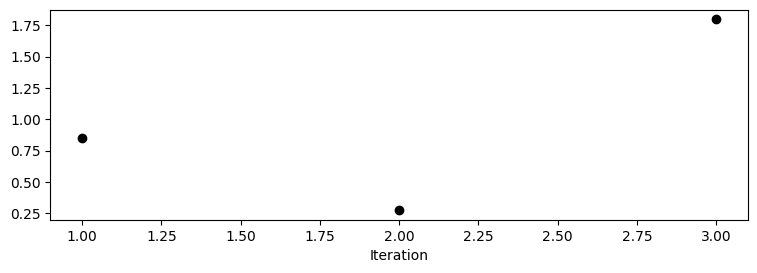

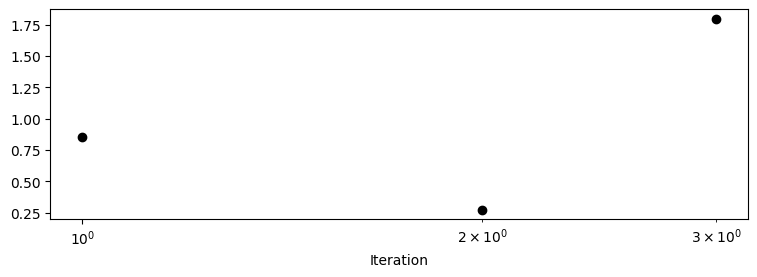

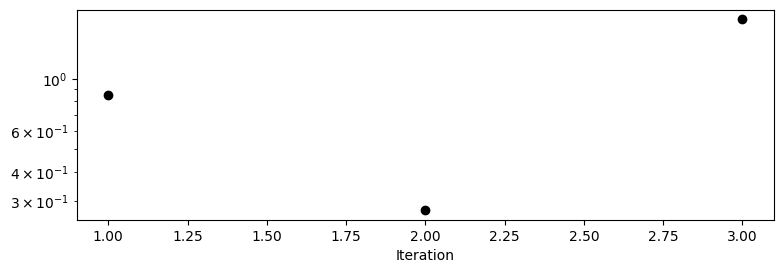

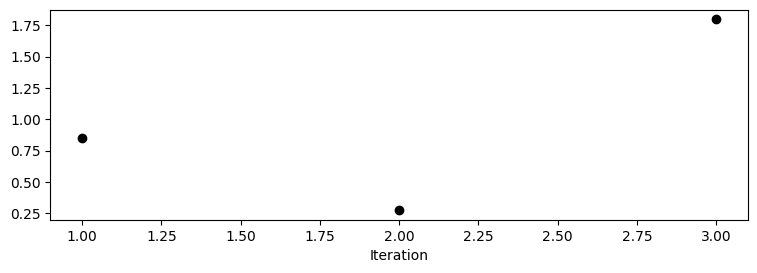

In [1]:
import pytest
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from spotPython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)


# number of initial points:
ni = 7
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
)
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
                fun_control=fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control,)
S.run()

# remove points from S.y so that there are less than ni points
S.y = S.y[:3]
# Test plot_progress with different parameters
S.plot_progress(show=False)  # Test with show=False
S.plot_progress(log_x=True, show=False)  # Test with log_x=True
S.plot_progress(log_y=True, show=False)  # Test with log_y=True
S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename